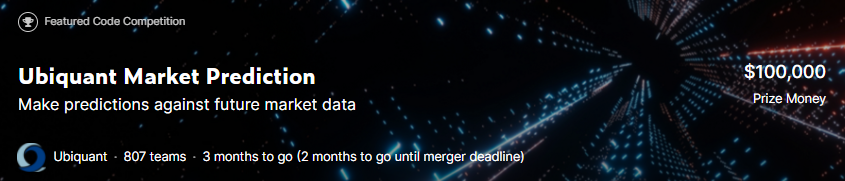

### 未来予測コンペです。他でもやったことがありますが、提出時には42位でしたが、最終的な結果は2000位で終了しました。
### そこで学んだことは、あまり複雑にしてLBを高くしても意味がないということです。
### 多くの学習/推論パターンを作成して、最終的に２つに絞る形で今回は進めようと思ってます。
### やっぱり、シンプルが一番かなという思いがあり、このコードを書いています。

<br>

### This is a future prediction competition. I've done this elsewhere, and was ranked 42nd when I submitted it, but ended up with a final result of 2000th.
### What I learned there is that it doesn't make sense to make it too complex and have high LB.
### I'm going to create a lot of learning/inference patterns, and finally narrow it down to two this time.
### I'm writing this code because I think simplicity is the best.

Translated with www.DeepL.com/Translator (free version)

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
train =True

In [ ]:
data_types_dict = {
    'time_id': 'int32',
    'investment_id': 'int16',
    "target": 'float16',
}

features = [f'f_{i}' for i in range(300)]

for f in features:
    data_types_dict[f] = 'float16'
    
target = 'target'

In [ ]:
%%time
train = pd.read_csv('/kaggle/input/ubiquant-market-prediction/train.csv', 
                       usecols = data_types_dict.keys(),
                       dtype=data_types_dict, 
                       index_col = 0)
train

In [ ]:
test = pd.read_csv('../input/ubiquant-market-prediction/example_test.csv')
test

In [ ]:
sub = pd.read_csv('../input/ubiquant-market-prediction/example_sample_submission.csv')

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
#!pip install optuna
import optuna 
import optuna.integration.lightgbm as lgbo

In [ ]:
y=train['target']
X=train.drop(['target'],axis=1)

reg = lgb.LGBMRegressor(n_estimators=150) 
reg.fit(X, y)

In [ ]:
import pickle
with open('reg', 'wb') as web:
    pickle.dump(reg, web)

In [ ]:
import ubiquant
env = ubiquant.make_env()  
iter_test = env.iter_test()
for (test_df, sample_prediction_df) in iter_test:
    #test = test_df.set_index('time_id')
    testx = test_df.drop(['row_id'],axis=1)
    
    test_df['pred'] = reg.predict(testx)
    
    for j,row in test_df.iterrows():
        sample_prediction_df.loc[sample_prediction_df['row_id'] == row['row_id'], 'target'] = row.pred
        
    env.predict(sample_prediction_df) 

In [ ]:
sample_prediction_df